/var/folders/cy/wrwx02w17cqc2zds1xjg55jc0000gn/T/ipykernel_48865/4032626273.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


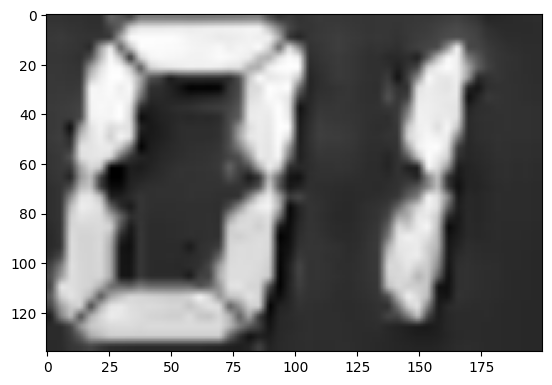

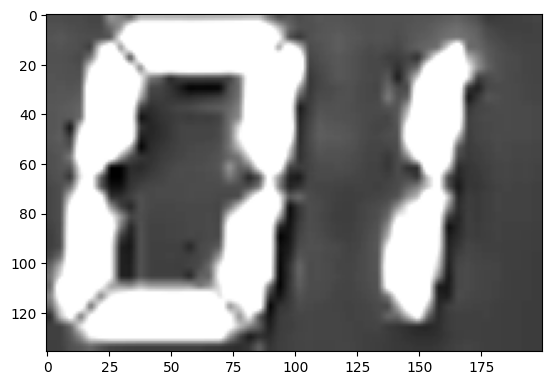

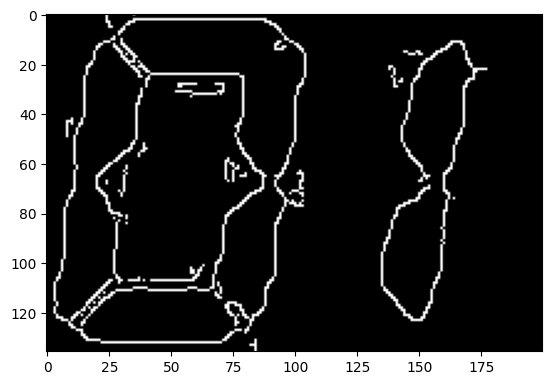

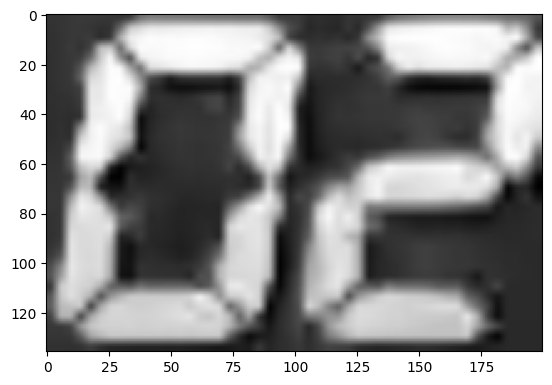

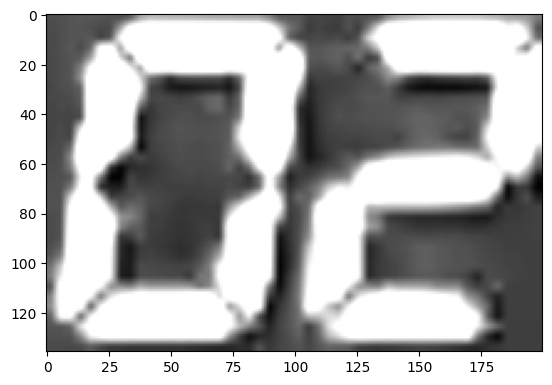

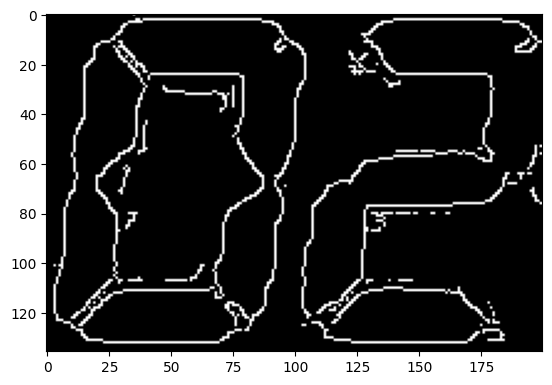

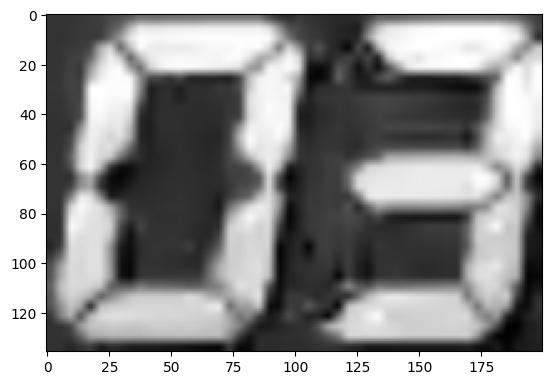

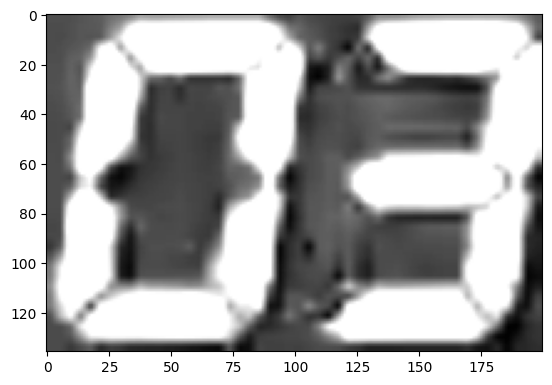

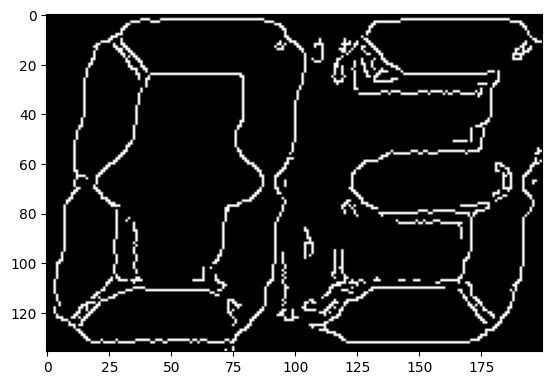

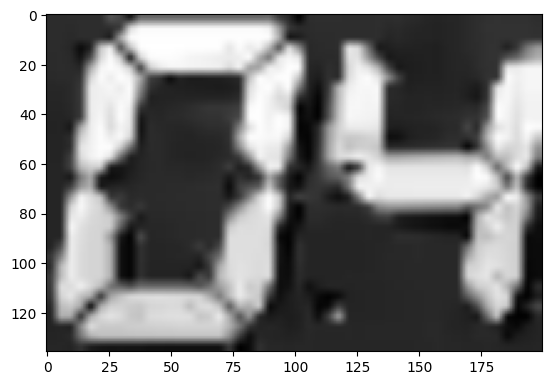

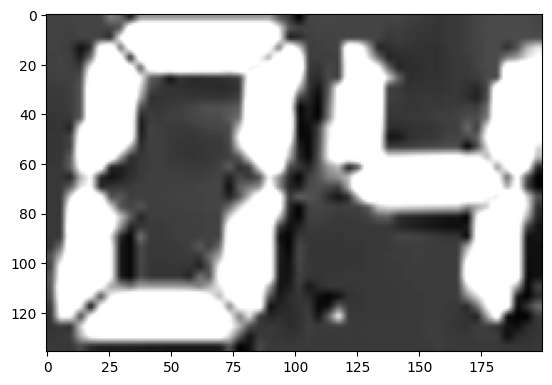

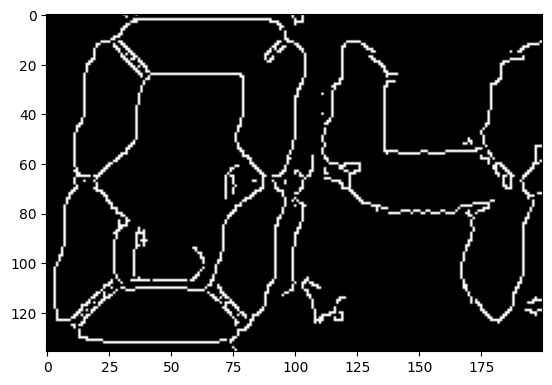

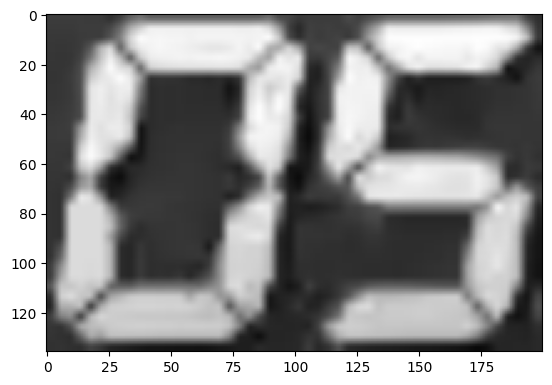

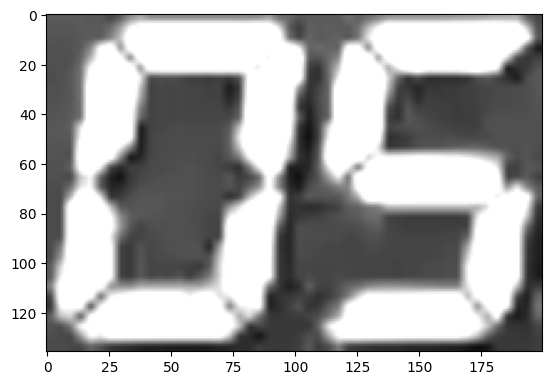

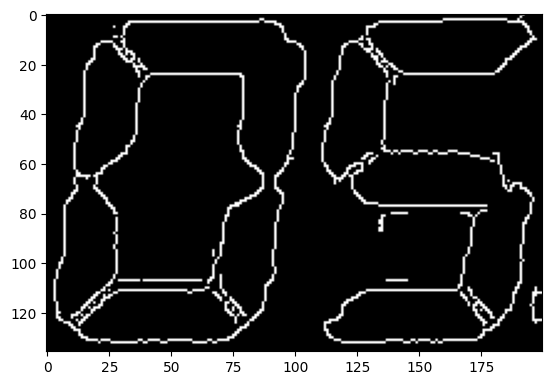

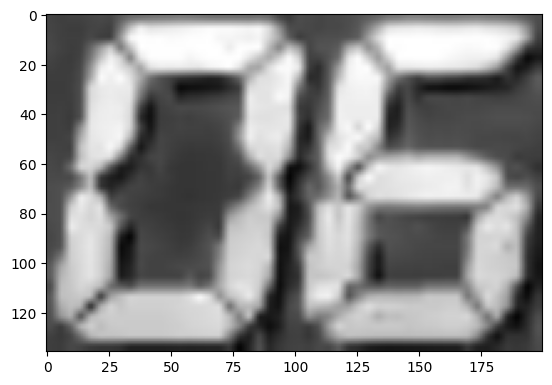

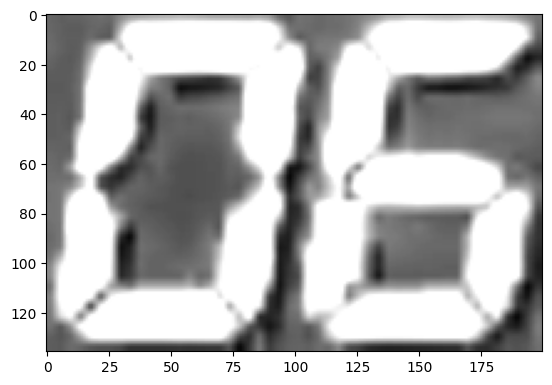

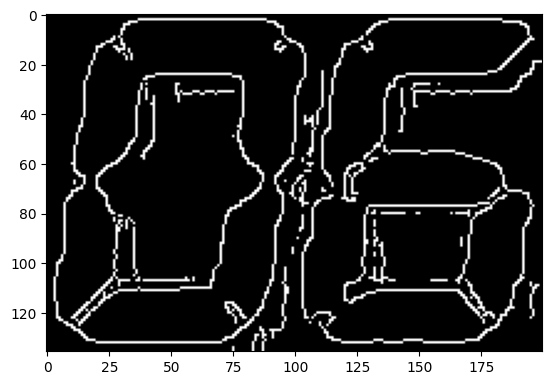

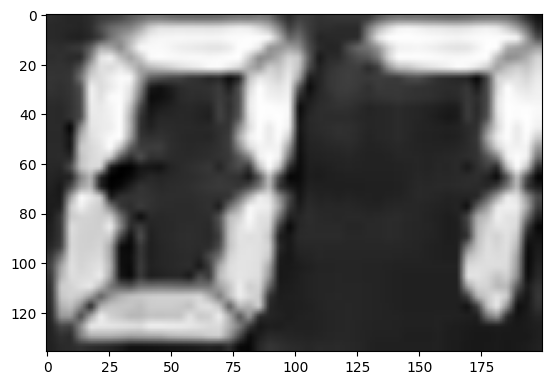

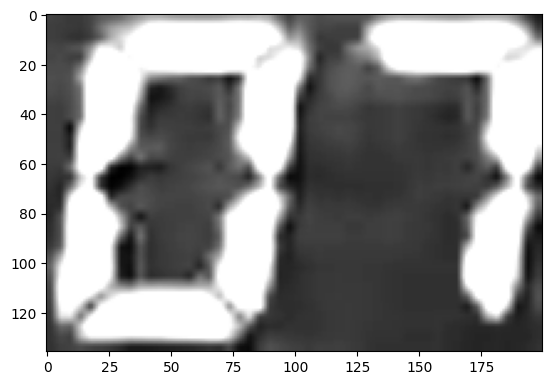

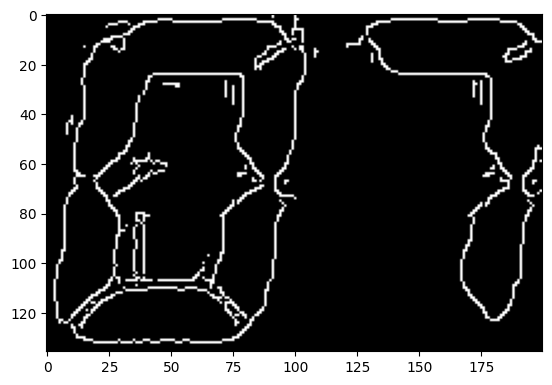

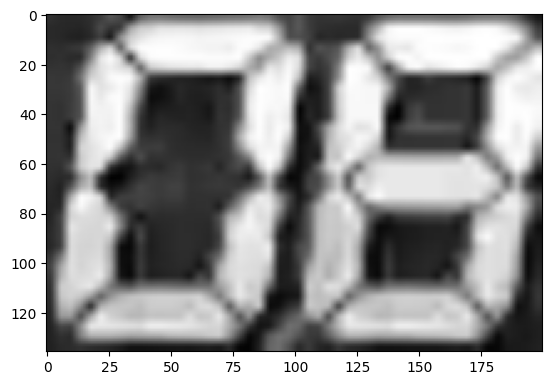

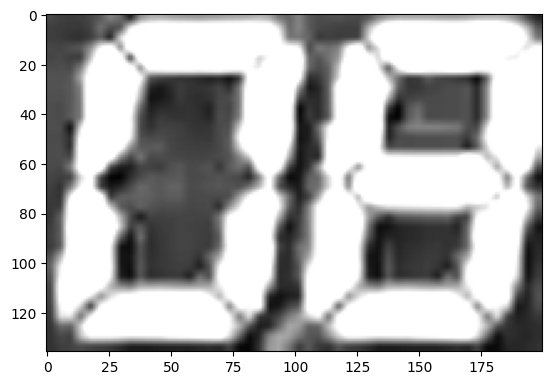

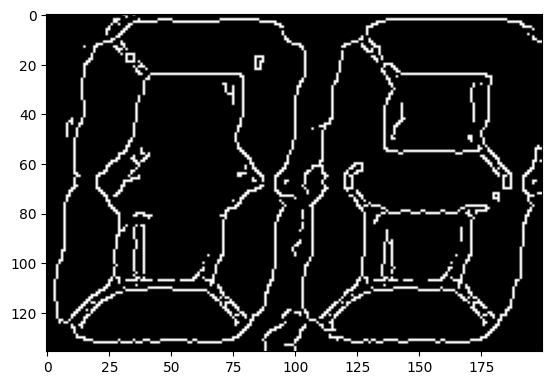

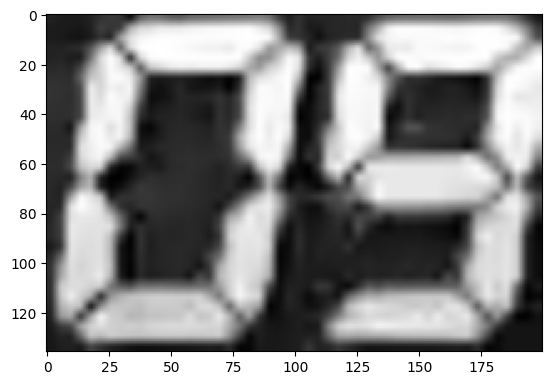

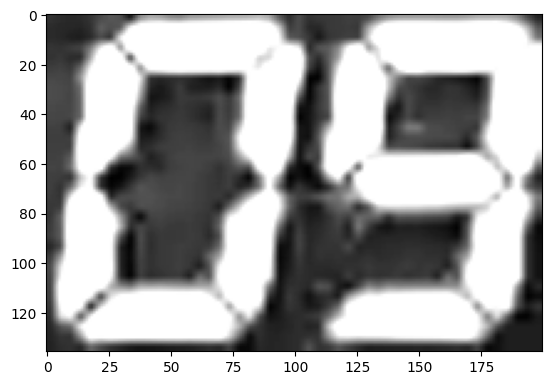

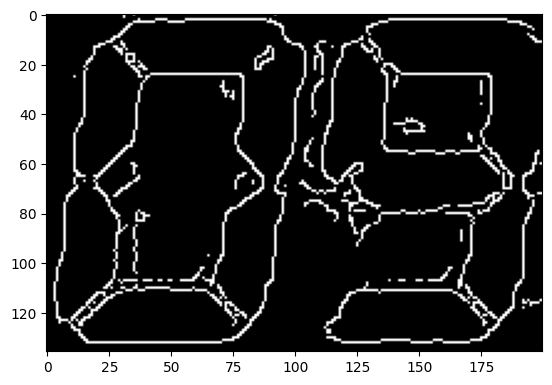

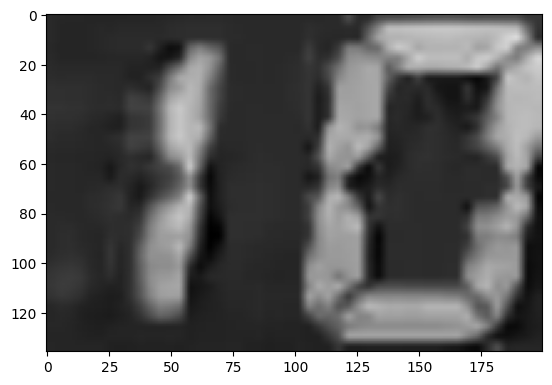

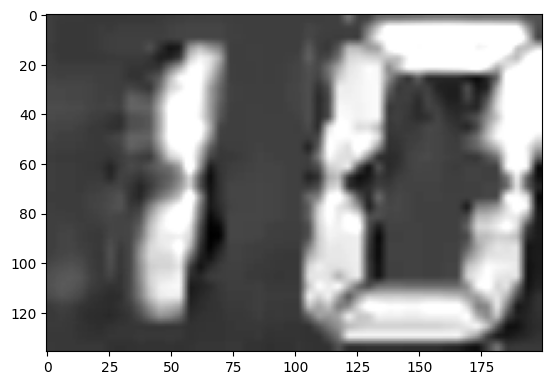

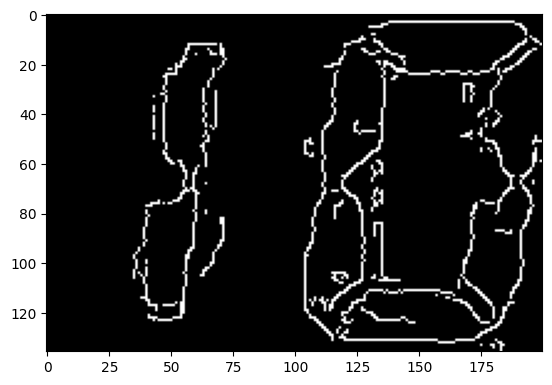

In [9]:
import os
import cv2
import matplotlib.pyplot as plt


base_path = '/Users/shingkai/code/personal-projects/mk8/MarioKart8CV/templates/coins/'
write_path = '/Users/shingkai/code/personal-projects/mk8/MarioKart8CV/templates/coins/edges/'

for i in range(1,11):
    img = cv2.imread(os.path.join(base_path, f"{i:02}.png"), 0)

    height, width = img.shape[:2]
    img = cv2.resize(img, (width * 4, height * 4))

    plt.figure()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    boosted = cv2.convertScaleAbs(img, alpha=1.5, beta=0)
    plt.figure()
    plt.imshow(cv2.cvtColor(boosted, cv2.COLOR_BGR2RGB))

    canny = cv2.Canny(boosted, threshold1=50, threshold2=150)
    plt.figure()
    plt.imshow(cv2.cvtColor(canny, cv2.COLOR_BGR2RGB))

    # cv2.imwrite(os.path.join(write_path, f"{i:02}.png"), canny)


plt.show()